# Machine Learning

We are going to include three models: KNN, decision tree and random forest.

1. Process data using different sampling strategies.
2. Implement KNN, DT and RF on the original, oversampled and undersampled dataset.
    Tune parameters to get the best performance on each model.
3. Build an ensemble model using KNN, DT and RF. Evalulate the results.

## 1. Process data using different sampling strategies.

In [1]:
import pandas as pd
import numpy as np
path = 'data/df_risk_factors_cervical_cancer.csv'
df = pd.read_csv(path, index_col = 0)

In [2]:
X = df.drop('Biopsy', axis = 1) # data without target
y = df['Biopsy'] # target

In [3]:
df.shape

(858, 14)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify=df['Biopsy'])

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [6]:
over = RandomOverSampler(sampling_strategy=1, random_state = 10)

In [7]:
X_overS, y_overS = over.fit_resample(X_train, y_train)

In [8]:
y_overS.value_counts()

0    642
1    642
Name: Biopsy, dtype: int64

In [9]:
under = RandomUnderSampler(sampling_strategy=1, random_state = 10)

In [10]:
X_underS, y_underS = under.fit_resample(X_train, y_train)

In [11]:
y_underS.value_counts()

0    44
1    44
Name: Biopsy, dtype: int64

## 2. Implement KNN, Decision Tree and Random Forest

### 2.1 KNN

Find the best k for different sampling strategies.

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, recall_score, precision_score, mean_absolute_error,roc_auc_score, confusion_matrix

In [12]:
# find the k that generates the biggest AUC

def findK_auc(X_v, y_v):
    biggestauc = 0
    smallestk = 1
    aucs = []
    for k in range(1, 70):
        knn = KNeighborsClassifier(n_neighbors = k) # 1
        knn.fit(X_v, y_v)
        y_pred_v = knn.predict(X_test)
        auc = roc_auc_score(y_test, y_pred_v)
        if (auc > biggestauc):
            smallestk = k
            biggestauc = auc
        aucs.append(auc)
    plt.plot(range(1, 70), aucs)
    print(smallestk)
    print(biggestauc)

In [13]:
# give feedback on [1]accuracy, [2]AUC, [3]confusion matrix, [4]TPR.
def getFeedback(y_t, y_p):
    print("- Accuracy")
    print(precision_score(y_t, y_p))
    print("- Recall")
    print(recall_score(y_t, y_p))
    print("- AUC")
    print(roc_auc_score(y_t, y_p))
    print("- Confusion Matrix")
    cm = confusion_matrix(y_t, y_p)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
    disp.plot()
    plt.show()

In [14]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### 2.1.1 Original Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

4
0.5


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

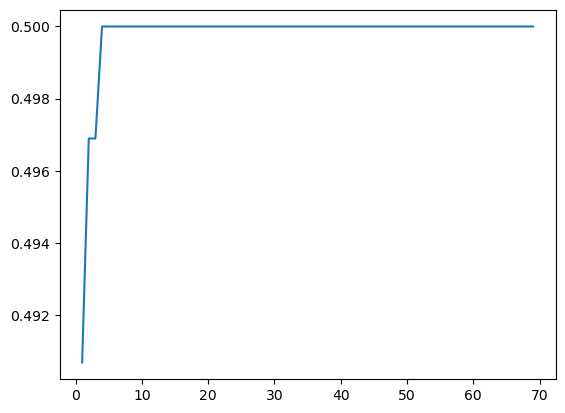

In [15]:
findK_auc(X_train, y_train)

When k = 4, AUC = 0.5.

In [16]:
knn_ori = KNeighborsClassifier(n_neighbors = 4)

In [17]:
knn_ori.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
y_pred_ori = knn_ori.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
# for test dataset
getFeedback(y_test, y_pred_ori)

- Accuracy
0.0
- Recall
0.0
- AUC
0.5
- Confusion Matrix
[[161   0]
 [ 11   0]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# for train datase
getFeedback(y_train, knn_ori.predict(X_train))

- Accuracy
0.0
- Recall
0.0
- AUC
0.5
- Confusion Matrix
[[642   0]
 [ 44   0]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.1.2 OverSampling Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

15
0.5657820440429137


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

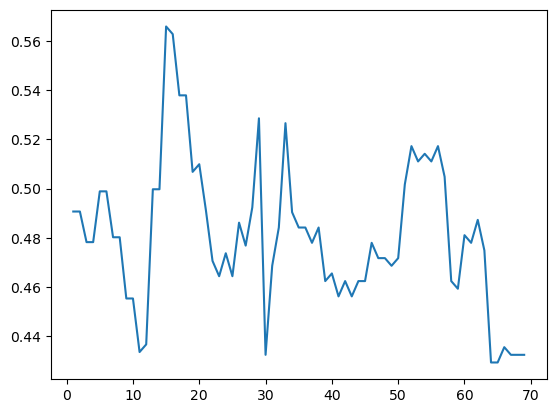

In [21]:
findK_auc(X_overS, y_overS)

When k = 15, AUC = 0.56

In [22]:
knn_over = KNeighborsClassifier(n_neighbors = 15)

In [23]:
knn_over.fit(X_overS, y_overS)

KNeighborsClassifier(n_neighbors=15)

In [24]:
knn_over.fit(X_overS, y_overS)

KNeighborsClassifier(n_neighbors=15)

In [25]:
y_pred_overS = knn_over.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
# test
getFeedback(y_test, y_pred_overS)

- Accuracy
0.08771929824561403
- Recall
0.45454545454545453
- AUC
0.5657820440429137
- Confusion Matrix
[[109  52]
 [  6   5]]


In [27]:
# train
getFeedback(y_overS, knn_over.predict(X_overS))

- Accuracy
0.7642857142857142
- Recall
1.0
- AUC
0.8457943925233645
- Confusion Matrix
[[444 198]
 [  0 642]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2.1.3 UnderSampling Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

3
0.6380575945793336


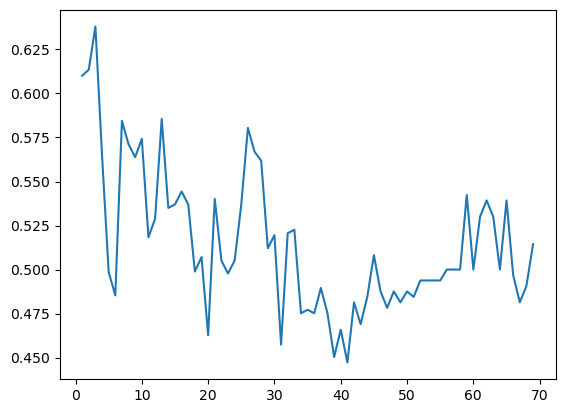

In [28]:
findK_auc(X_underS, y_underS)

In [36]:
# k = 3, AUC = 0.638

In [16]:
knn_under = KNeighborsClassifier(n_neighbors = 3)

In [17]:
knn_under.fit(X_underS, y_underS)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred_underS = knn_under.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- Accuracy
0.1076923076923077
- Recall
0.6363636363636364
- AUC
0.6380575945793336
- Confusion Matrix
[[103  58]
 [  4   7]]


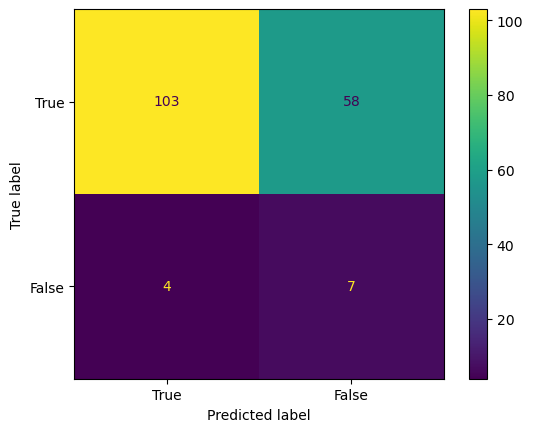

In [19]:
# test
getFeedback(y_test, y_pred_underS)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, label=['True', 'False'])
disp.plot()
plt.show()

In [24]:
# train
getFeedback(y_underS, knn_under.predict(X_underS))

- Accuracy
0.7777777777777778
- Recall
0.6363636363636364
- AUC
0.7272727272727272
- Confusion Matrix
[[36  8]
 [16 28]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### KNN, using UnderSampling, with k = 3, achieves the best accuracy and auc.

/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1501/3979959752.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


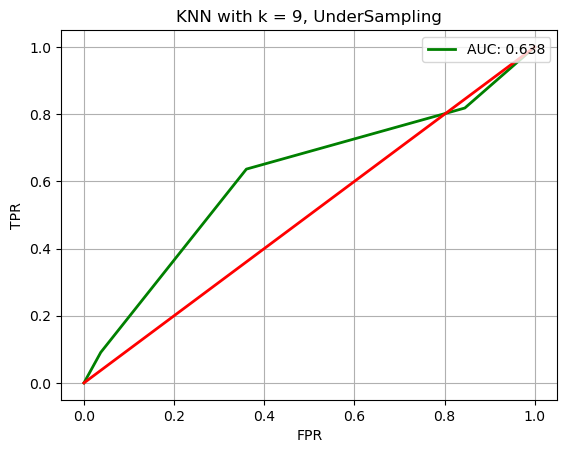

In [42]:
p_pro = knn_under.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_underS)
fprs,tprs,t=roc_curve(y_test,p_pro)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs,tprs,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.title("KNN with k = 9, UnderSampling")
plt.grid(b=True)
plt.show()

In [43]:
getFeedback(y_test, y_pred_underS)

- Accuracy
0.1076923076923077
- Recall
0.6363636363636364
- AUC
0.6380575945793336
- Confusion Matrix
[[103  58]
 [  4   7]]


In [44]:
# Skater

In [21]:
model = InMemoryModel(knn_under.predict_proba, examples = X_train)

In [22]:
interpreter = Interpretation()

In [23]:
interpreter.load_data(X_train)

In [24]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:Cancer                          0.000000
Dx:CIN                             0.000000
Dx:HPV                             0.000000
Dx                                 0.000000
STDs (number)                      0.011439
Smokes (packs/year)                0.015051
IUD (years)                        0.022878
Smokes (years)                     0.049970
Num of pregnancies                 0.089103
Number of sexual partners          0.095725
Hormonal Contraceptives (years)    0.186635
First sexual intercourse           0.190849
Age                                0.338350
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

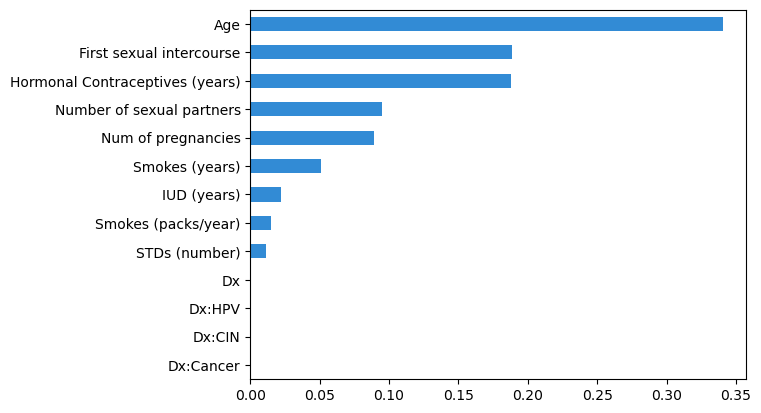

In [25]:
interpreter.feature_importance.plot_feature_importance(model, ascending=False)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

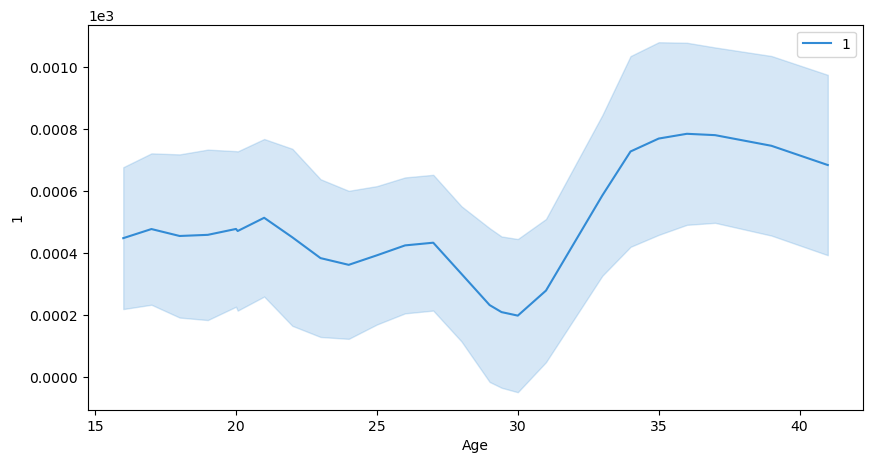

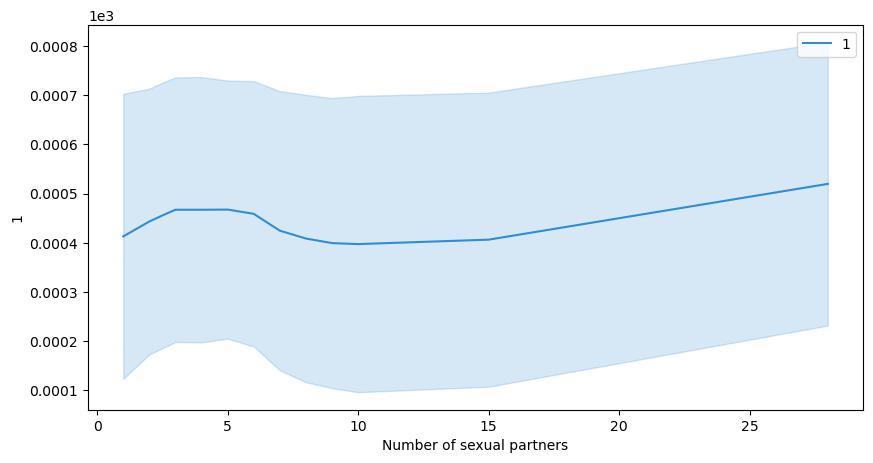

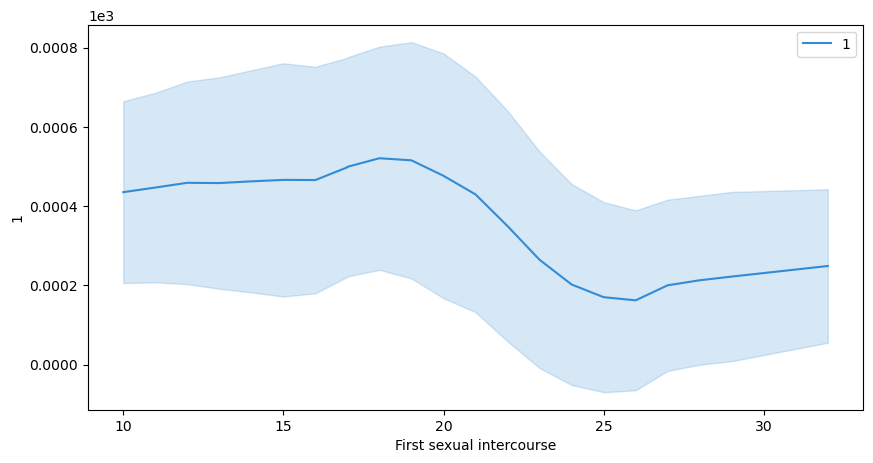

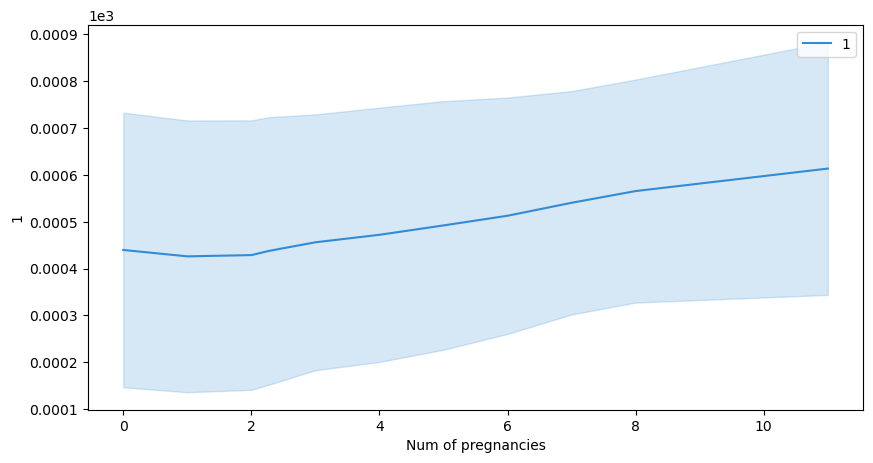

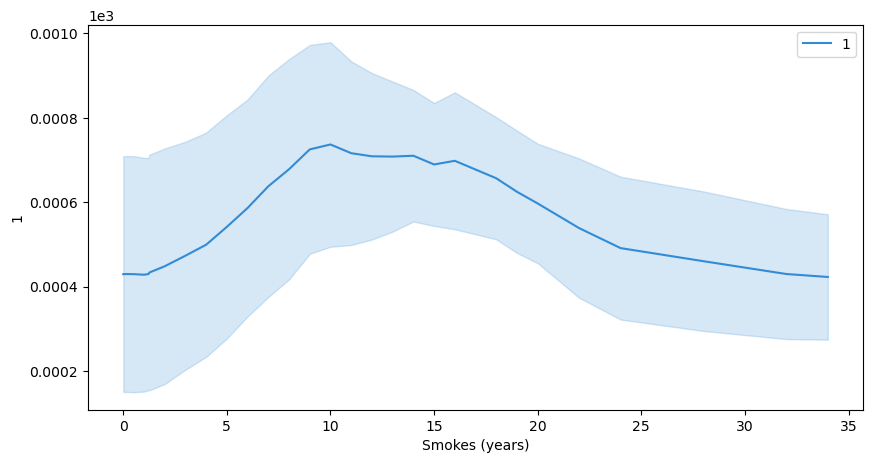

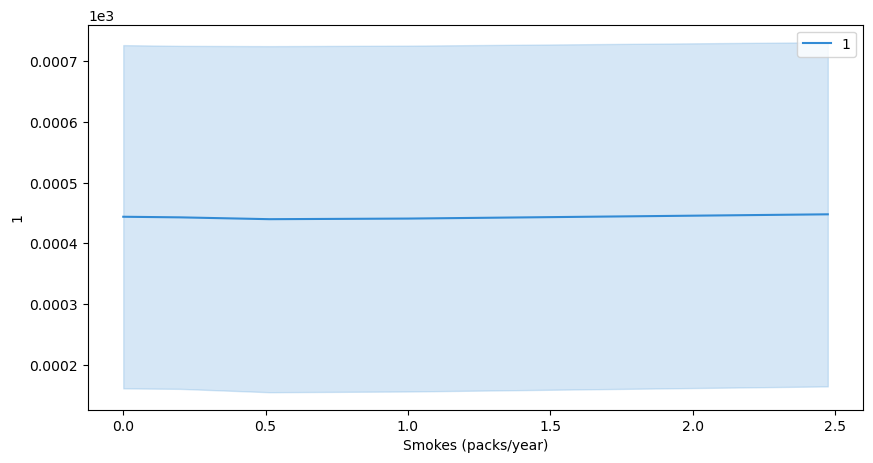

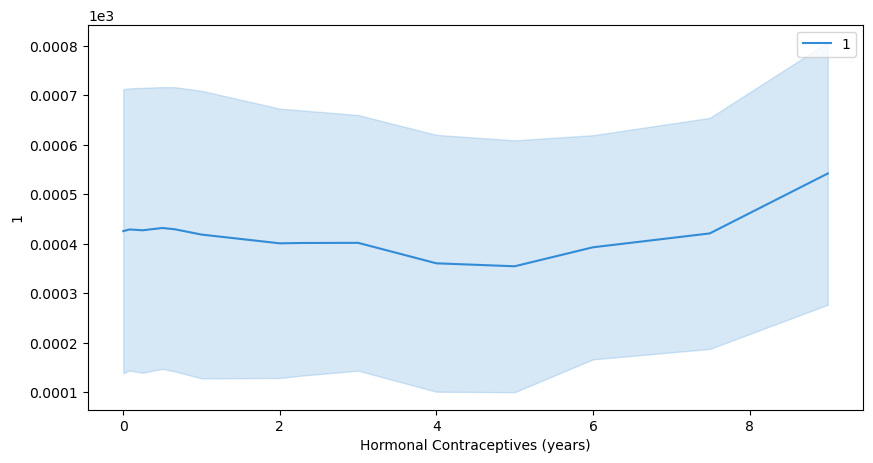

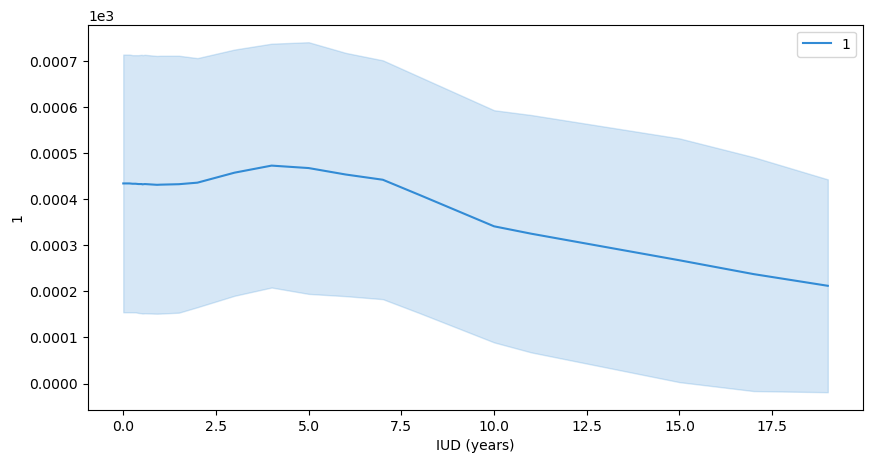

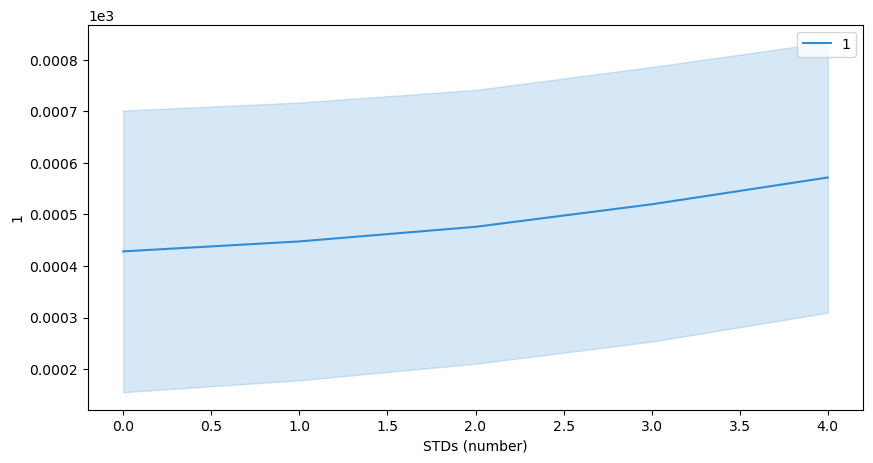

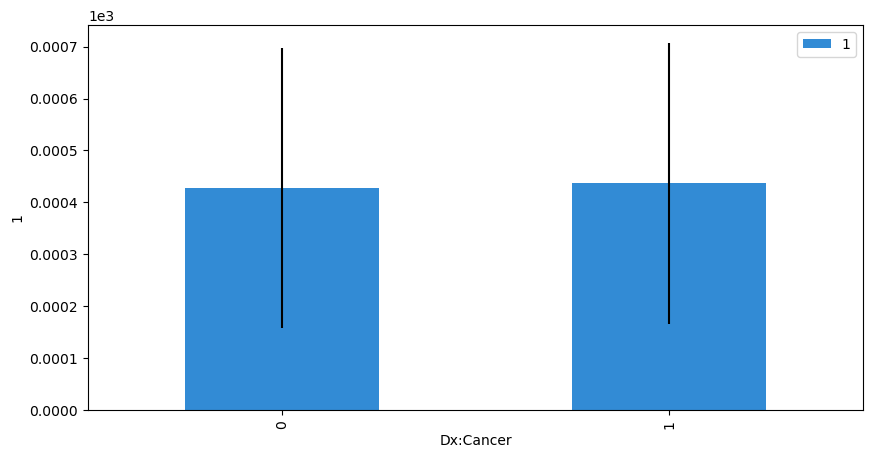

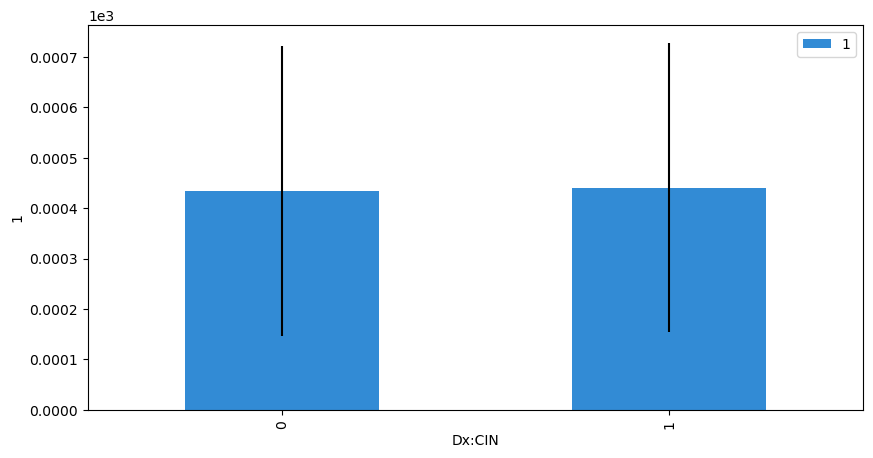

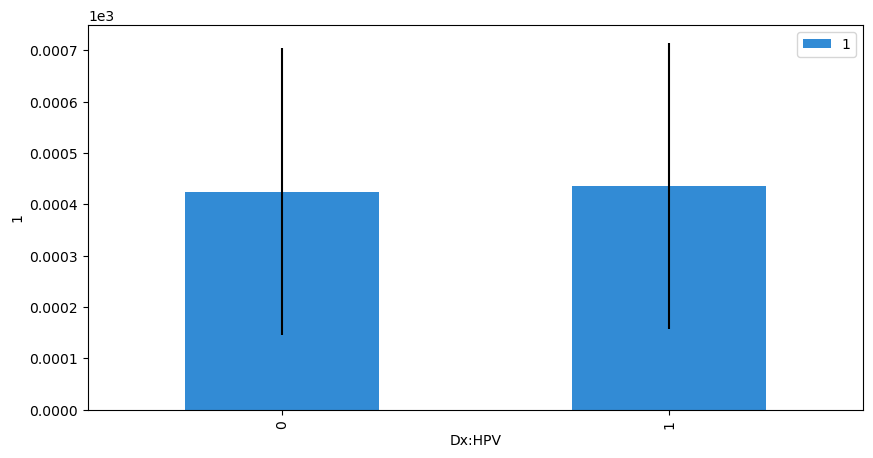

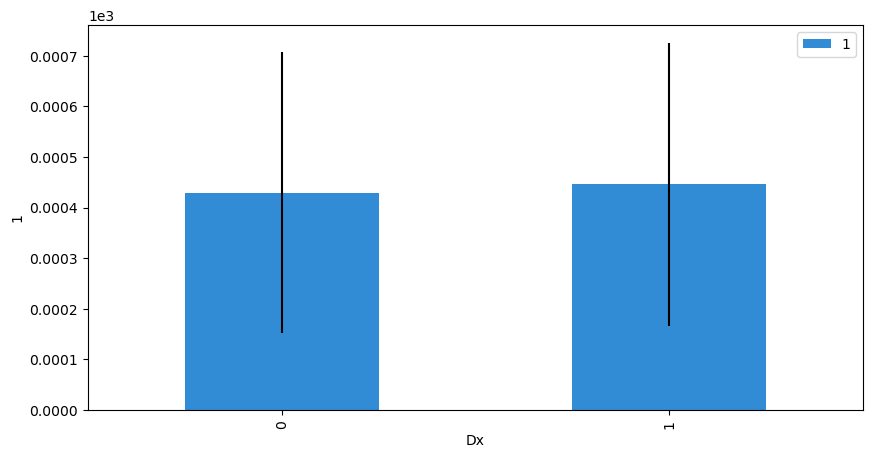

In [50]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

### 2.2 Decision Tree

In [26]:
from sklearn import tree

### 2.2.1 class_weight = 'balanced'

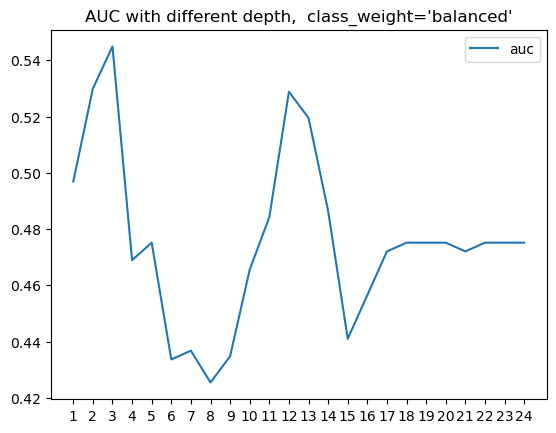

3
0.5448898927159795


In [52]:
aucs = []
biggestauc = 0
smallestk = 1

for i in range(1,25):
    clf1 = tree.DecisionTreeClassifier(
                            max_depth=i,
                            class_weight='balanced')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    if (auc > biggestauc):
        smallestk = i
        biggestauc = auc
    aucs.append(auc)

plt.plot(range(1,25), aucs, label='auc')
plt.xticks(range(1,25))
plt.title("AUC with different depth,  class_weight='balanced'")
plt.legend()
plt.show()
print(smallestk)
print(biggestauc)

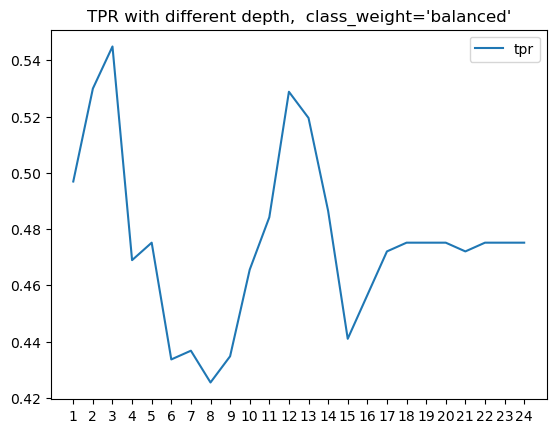

3
0.6363636363636364


In [53]:
# TPR ~ max_depth
tprs = []
biggesttpr = 0
smallestk = 1

for i in range(1,25):
    clf1 = tree.DecisionTreeClassifier(
                            max_depth=i,
                            class_weight='balanced')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tpr = cm[1][1] / (cm[1][1] + cm[1][0])
    if (tpr > biggesttpr):
        smallestk = i
        biggesttpr = tpr
    tprs.append(tpr)

plt.plot(range(1,25), aucs, label='tpr')
plt.xticks(range(1,25))
plt.title("TPR with different depth,  class_weight='balanced'")
plt.legend()
plt.show()
print(smallestk)
print(biggesttpr)

In [54]:
# max_depth = 3 leads to the best AUC and TPR performance when using balanced str

In [30]:
clf_bal = tree.DecisionTreeClassifier(max_depth = 3, class_weight='balanced')
clf_bal.fit(X_train, y_train)
y_pred_bal = clf_bal.predict(X_test)

In [31]:
# test
getFeedback(y_test, y_pred_bal)

- Accuracy
0.07368421052631578
- Recall
0.6363636363636364
- AUC
0.5448898927159795
- Confusion Matrix
[[73 88]
 [ 4  7]]


In [32]:
# train
getFeedback(y_train, clf_bal.predict(X_train))

- Accuracy
0.10303030303030303
- Recall
0.7727272727272727
- AUC
0.6558340413480599
- Confusion Matrix
[[346 296]
 [ 10  34]]


### 2.2.1 OverSampling Dataset

In [58]:
def findK_auc_dt(X_t, y_t):
    aucs = []
    biggestauc = 0
    smallestk = 1

    for i in range(1,25):
        clf = tree.DecisionTreeClassifier(
                            max_depth=i)
        clf.fit(X_t, y_t)
        y_pred = clf.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        if (auc > biggestauc):
            smallestk = i
            biggestauc = auc
        aucs.append(auc)

    plt.plot(range(1,25), aucs, label='auc')
    plt.xticks(range(1,25))
    plt.title("AUC with different depths")
    plt.legend()
    plt.show()
    print(smallestk)
    print(biggestauc)

In [59]:
def findK_tpr_dt(X_t, y_t):
    tprs = []
    biggesttpr = 0
    smallestk = 1

    for i in range(1,25):
        clf1 = tree.DecisionTreeClassifier(
                            max_depth=i)
        clf1.fit(X_t, y_t)
        y_pred = clf1.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tpr = cm[1][1] / (cm[1][1] + cm[1][0])
        if (tpr > biggesttpr):
            smallestk = i
            biggesttpr = tpr
        tprs.append(tpr)

    plt.plot(range(1,25), aucs, label='tpr')
    plt.xticks(range(1,25))
    plt.title("TPR with different depths")
    plt.legend()
    plt.show()
    print(smallestk)
    print(biggesttpr)

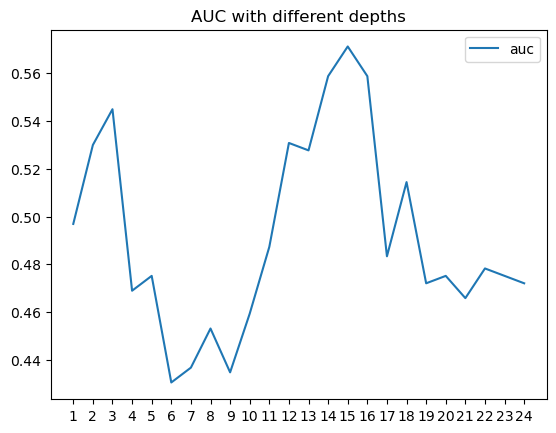

15
0.5711462450592886


In [99]:
findK_auc_dt(X_overS, y_overS)

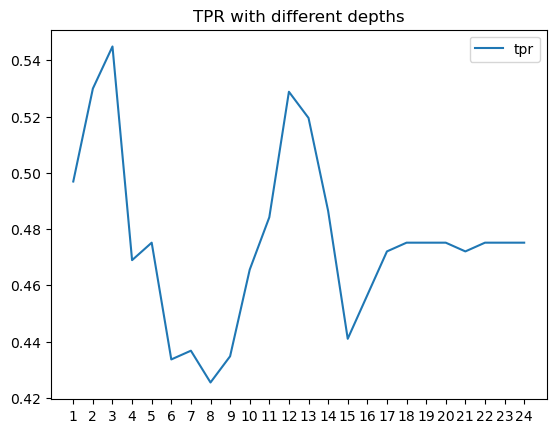

3
0.6363636363636364


In [100]:
findK_tpr_dt(X_overS, y_overS)

In [87]:
# max_depth = 15 leads to the best TPR performance when using oversampling stargey

In [101]:
clf_over = tree.DecisionTreeClassifier(max_depth = 15)
clf_over.fit(X_overS, y_overS)
y_pred_over = clf_over.predict(X_test)

In [102]:
# test
getFeedback(y_test, y_pred_over)

- Accuracy
0.12
- Recall
0.2727272727272727
- AUC
0.5680406549971767
- Confusion Matrix
[[139  22]
 [  8   3]]


In [103]:
# train
getFeedback(y_overS, clf_over.predict(X_overS))

- Accuracy
0.921090387374462
- Recall
1.0
- AUC
0.957165109034268
- Confusion Matrix
[[587  55]
 [  0 642]]


### 2.2.2 UnderSampling Dataset

In [35]:
findK_auc_dt(X_underS, y_underS)

NameError: name 'findK_auc_dt' is not defined

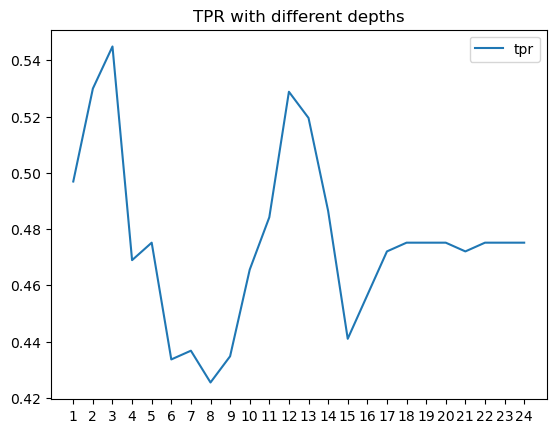

13
0.7272727272727273


In [105]:
findK_tpr_dt(X_underS, y_underS)

In [27]:
# max_depth = 4 leads to the best TPR performance when using undersampling stargey

clf_under = tree.DecisionTreeClassifier(max_depth = 4)
clf_under.fit(X_underS, y_underS)
y_pred_under = clf_under.predict(X_test)

- Accuracy
0.2222222222222222
- Recall
0.5454545454545454
- AUC
0.7075098814229249
- Confusion Matrix
[[140  21]
 [  5   6]]


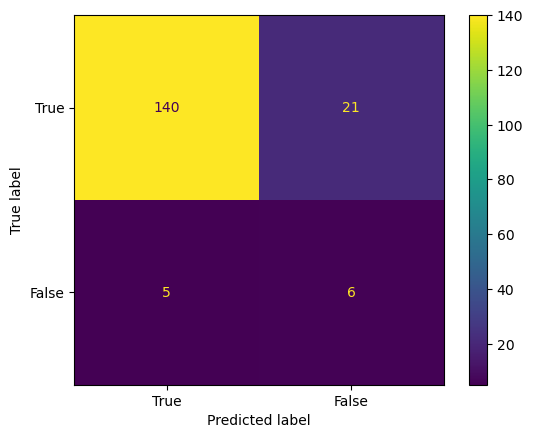

In [28]:
# test
getFeedback(y_test, y_pred_under)

In [109]:
# train
getFeedback(y_underS, clf_under.predict(X_underS))

- Accuracy
1.0
- Recall
0.5454545454545454
- AUC
0.7727272727272727
- Confusion Matrix
[[44  0]
 [20 24]]


### Decision tree, using UnderSampling, with max_depth = 4, achieves the best accuracy and auc.

/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1501/1269711559.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


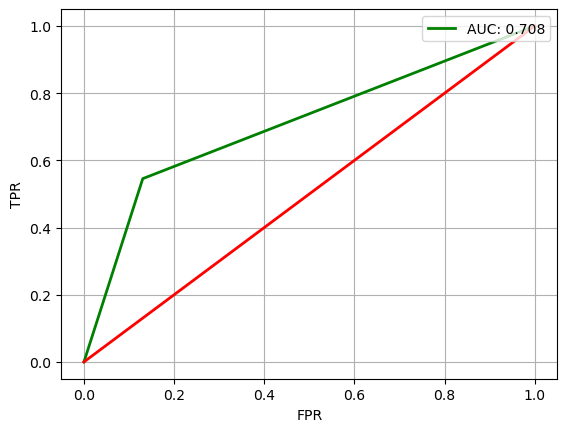

In [111]:
fprs3,tprs3,t=roc_curve(y_test,y_pred_under)
auc = roc_auc_score(y_test, y_pred_under)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs3,tprs3,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.grid(b=True)
plt.show()

In [112]:
getFeedback(y_test, y_pred_under)

- Accuracy
0.2222222222222222
- Recall
0.5454545454545454
- AUC
0.7075098814229249
- Confusion Matrix
[[140  21]
 [  5   6]]


In [113]:
# Skater

In [29]:
model = InMemoryModel(clf_under.predict_proba, examples = X_train)

In [30]:
interpreter = Interpretation()

In [31]:
interpreter.load_data(X_train)

In [32]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Number of sexual partners          0.000000
First sexual intercourse           0.000000
Num of pregnancies                 0.000000
Smokes (years)                     0.000000
Dx:Cancer                          0.000000
Dx:CIN                             0.000000
Dx:HPV                             0.000000
Smokes (packs/year)                0.031959
IUD (years)                        0.031959
Age                                0.090928
Dx                                 0.121237
Hormonal Contraceptives (years)    0.298144
STDs (number)                      0.425773
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

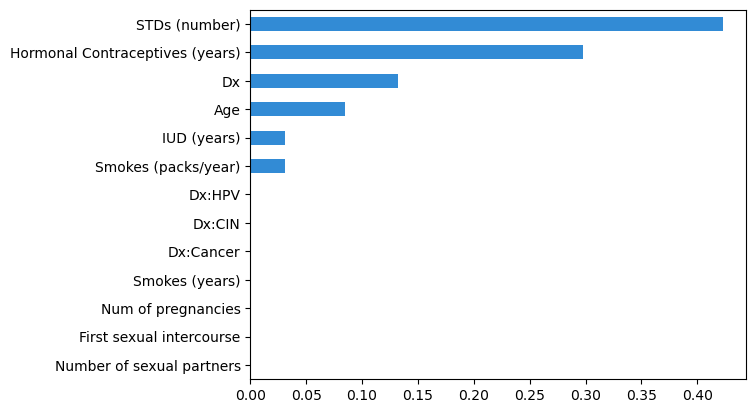

In [34]:
interpreter.feature_importance.plot_feature_importance(model, ascending=False)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

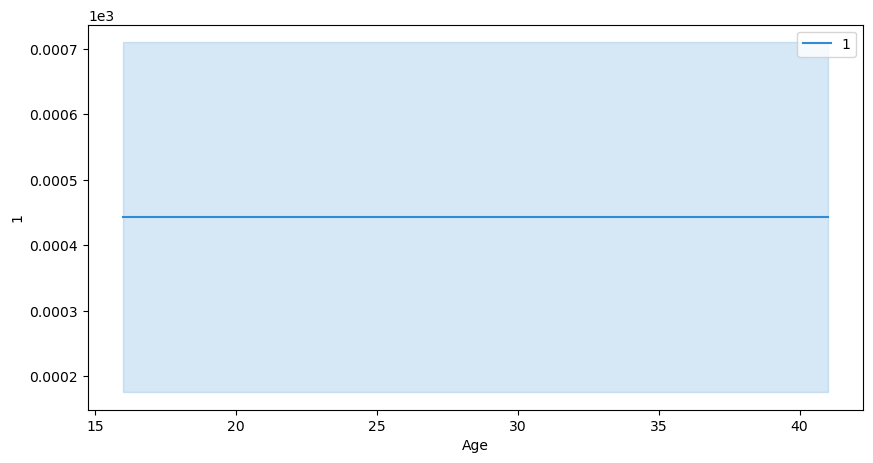

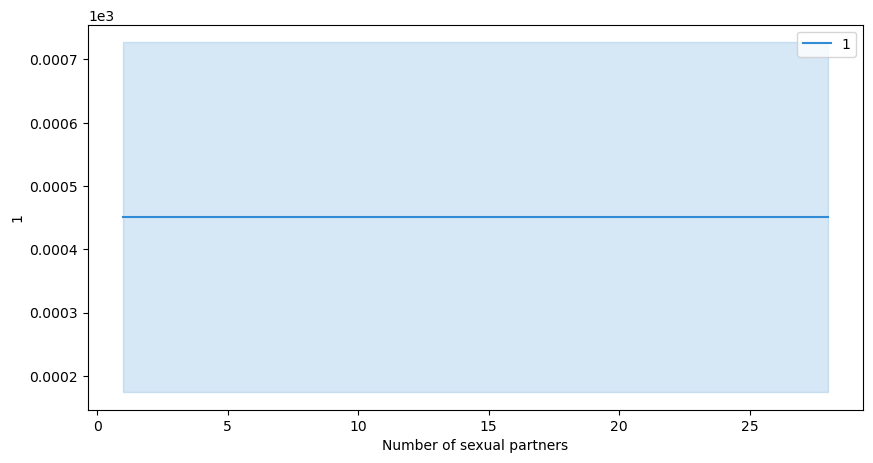

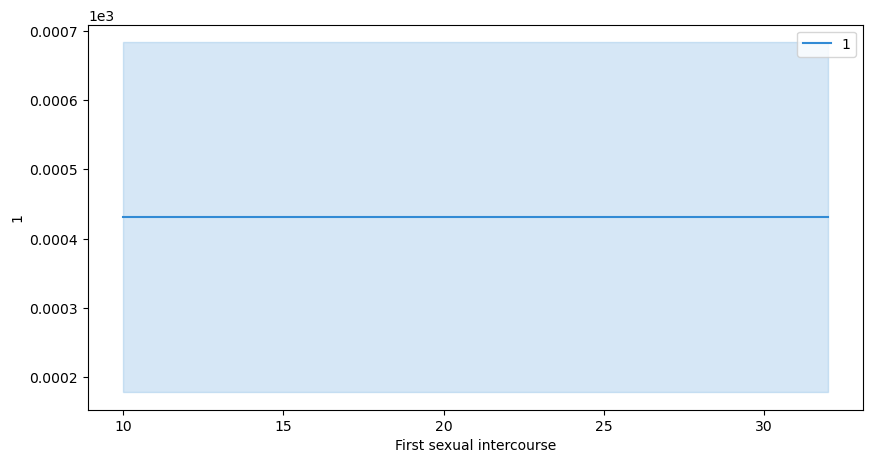

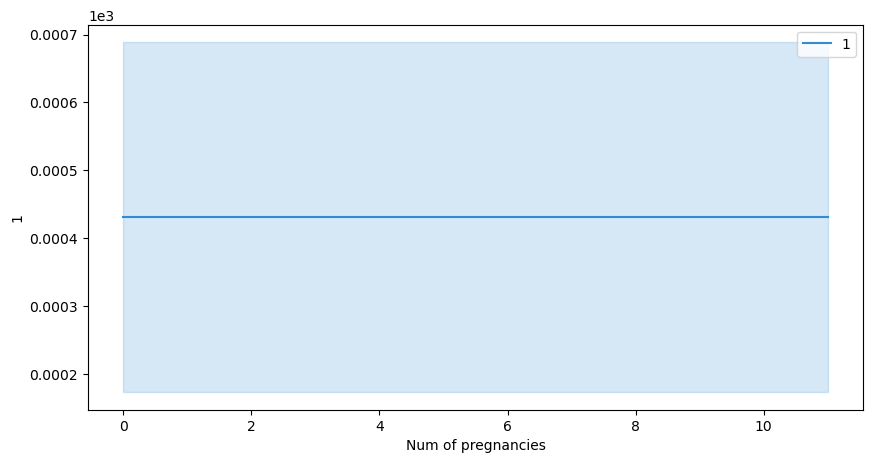

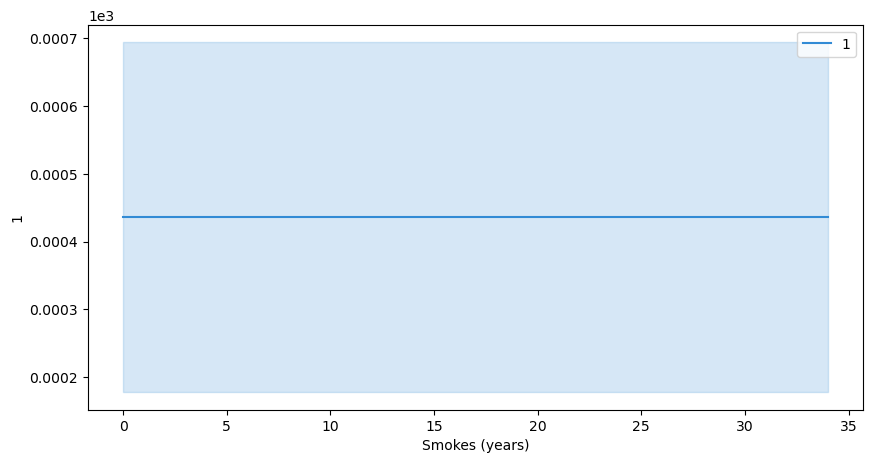

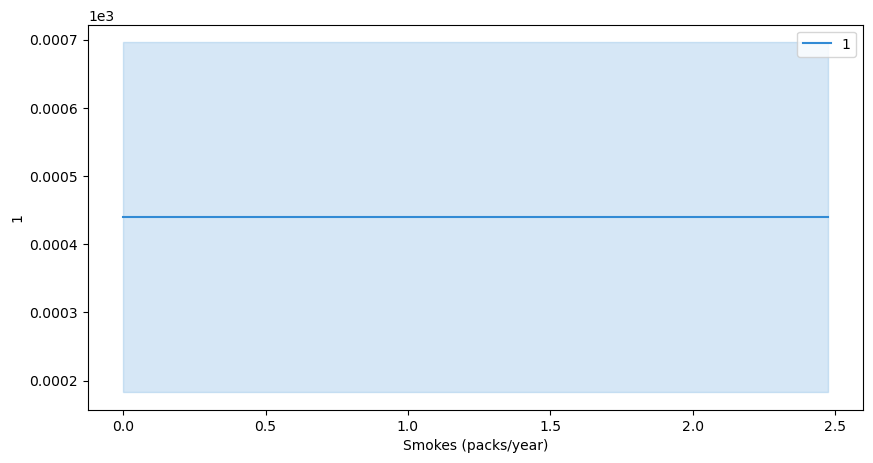

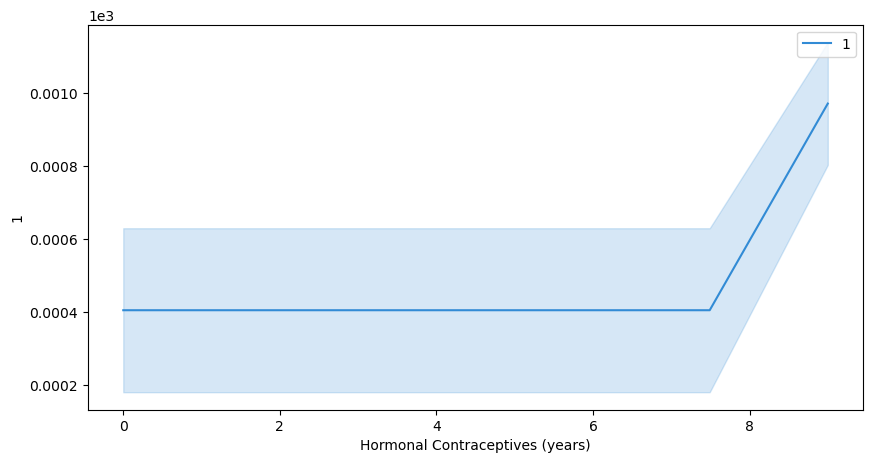

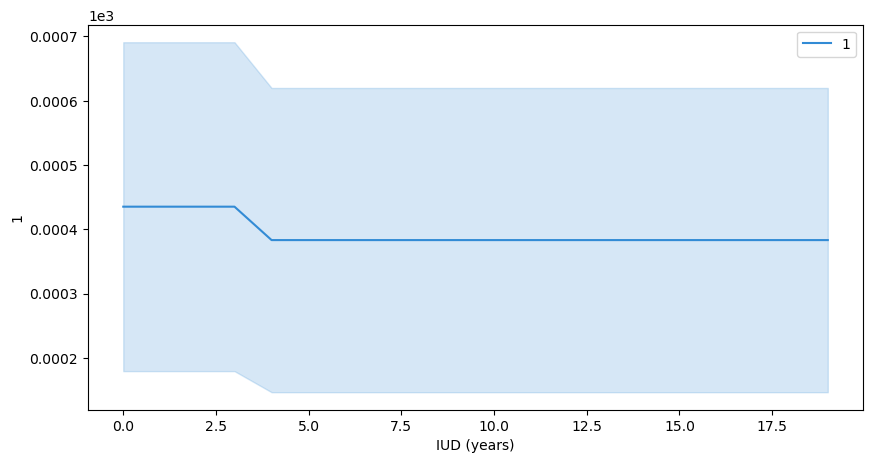

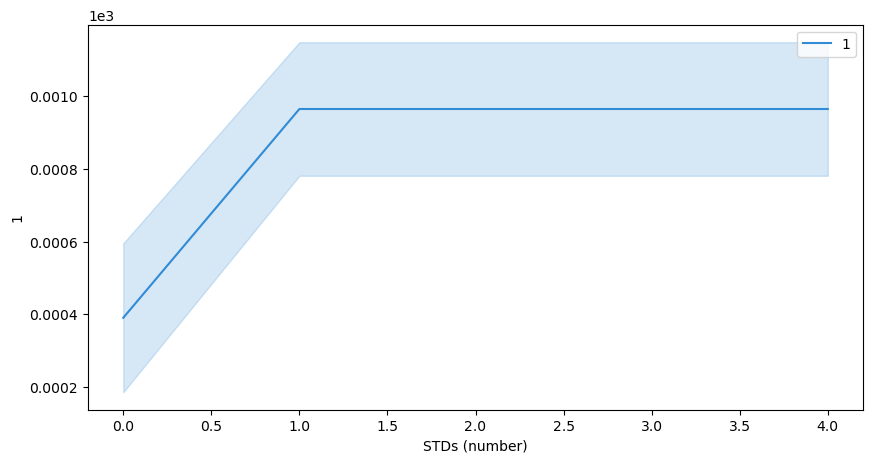

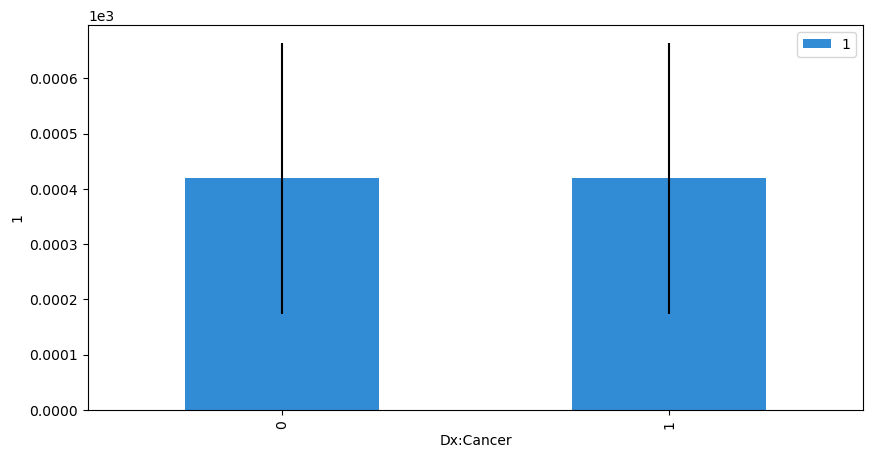

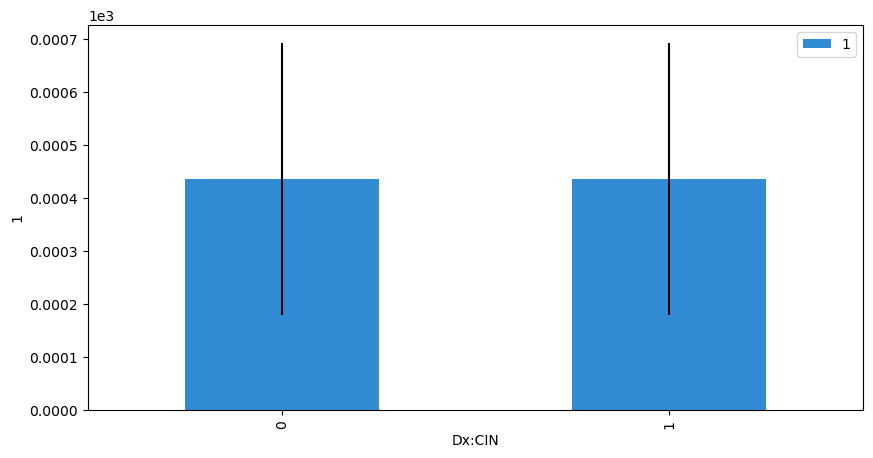

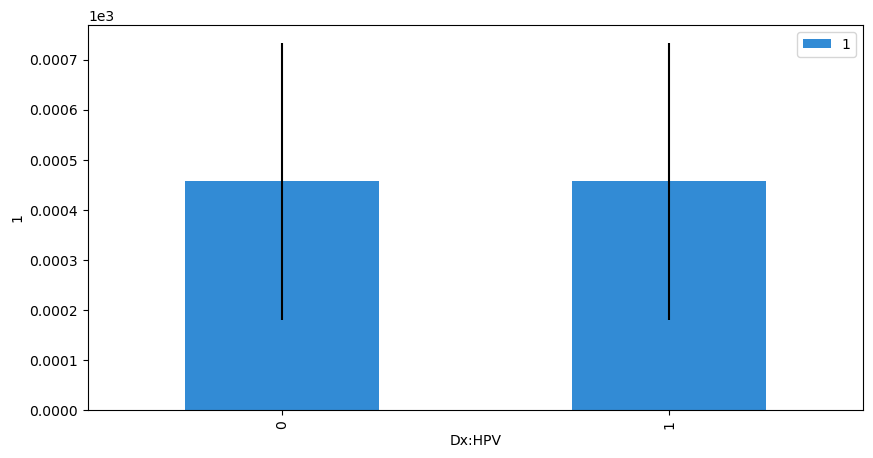

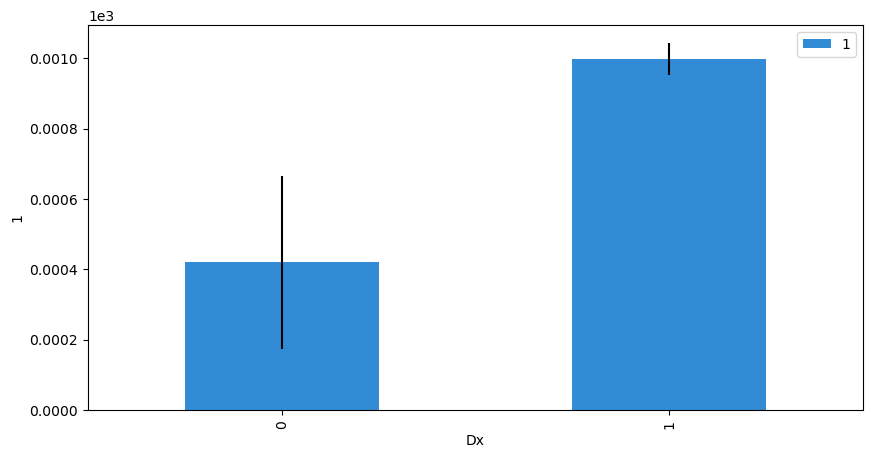

In [119]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

### 2.3 Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

### 2.3.1 Original Dataset

In [123]:
def findn_AUC(X_t, y_t):
    aucs = []
    biggestauc = 0
    smallest_n = 1
    smallest_m = 1

    for i in range(1,20):
        for j in range(1, 40):
            clf1 = RandomForestClassifier(
            n_estimators = i * 10,
            max_depth = j)
            clf1.fit(X_t, y_t)
            y_p = clf1.predict(X_test)
            auc = roc_auc_score(y_test, y_p)
            if (auc > biggestauc):
                smallest_n = i
                smallest_m = j
                biggestauc = auc
            aucs.append(auc)

    print(smallest_n)
    print(smallest_m)
    print(biggestauc)

In [124]:
def find_TPR(X_t, y_t):
    # TPR ~ max_depth
    tprs = []
    biggesttpr = 0
    smallest_n = 1
    smallest_m = 1
    
    for i in range(1,20):
        for j in range(1, 40):
            clf2 = RandomForestClassifier(
            n_estimators = i * 10,
            max_depth = j)
            clf2.fit(X_t, y_t)
            y_p = clf2.predict(X_test)
            cm = confusion_matrix(y_test, y_p)
            tpr = cm[1][1] / (cm[1][1] + cm[1][0])
            if (tpr > biggesttpr):
                smallest_n = i
                smallest_m = j
                biggesttpr = tpr
            tprs.append(tpr)
           
    print(smallest_n)
    print(smallest_m)
    print(biggesttpr)

In [125]:
findn_AUC(X_train, y_train)

1
9
0.5454545454545454


In [126]:
find_TPR(X_train, y_train)

1
6
0.09090909090909091


In [41]:
clf2 = RandomForestClassifier(
            n_estimators = 10,
            max_depth = 9)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [42]:
# test
getFeedback(y_test, y_pred)

- Accuracy
0.0
- Recall
0.0
- AUC
0.4968944099378882
- Confusion Matrix
[[160   1]
 [ 11   0]]


In [43]:
# train
getFeedback(y_train, clf2.predict(X_train))

- Accuracy
1.0
- Recall
0.4090909090909091
- AUC
0.7045454545454546
- Confusion Matrix
[[642   0]
 [ 26  18]]


### 2.3.2 Oversampling Dataset

In [44]:
findn_AUC(X_overS, y_overS)

NameError: name 'findn_AUC' is not defined

In [132]:
find_TPR(X_overS, y_overS)

2
5
0.45454545454545453


In [133]:
clf1 = RandomForestClassifier(
            n_estimators = 50,
            max_depth = 6)
clf1.fit(X_overS, y_overS)
y_p = clf1.predict(X_test)

In [134]:
# test
getFeedback(y_test, y_p)

- Accuracy
0.3333333333333333
- Recall
0.2727272727272727
- AUC
0.6177300959909656
- Confusion Matrix
[[155   6]
 [  8   3]]


In [135]:
# train
getFeedback(y_overS, clf1.predict(X_overS))

- Accuracy
0.9563218390804598
- Recall
0.6479750778816199
- AUC
0.809190031152648
- Confusion Matrix
[[623  19]
 [226 416]]


### 2.3.3 Undersampling Dataset

In [136]:
findn_AUC(X_underS, y_underS)

4
34
0.8260869565217391


In [137]:
find_TPR(X_underS, y_underS)

3
36
1.0


In [38]:
clf1 = RandomForestClassifier(
           n_estimators = 40,
            max_depth = 34  )
clf1.fit(X_underS, y_underS)
y_p = clf1.predict(X_test)

- Accuracy
0.15254237288135594
- Recall
0.8181818181818182
- AUC
0.7538114059853191
- Confusion Matrix
[[111  50]
 [  2   9]]


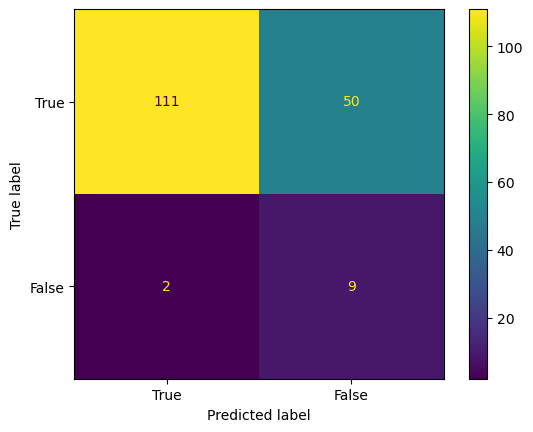

In [39]:
# test
getFeedback(y_test, y_p)

In [140]:
# train
getFeedback(y_underS, clf1.predict(X_underS))

- Accuracy
1.0
- Recall
0.9772727272727273
- AUC
0.9886363636363636
- Confusion Matrix
[[44  0]
 [ 1 43]]


/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1501/2860894987.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


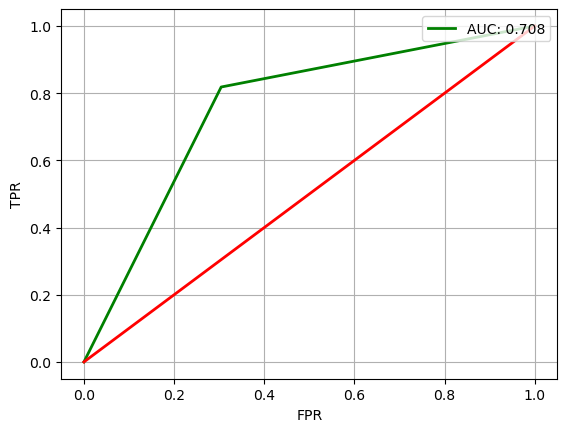

In [141]:
# graph
fprs1,tprs1,t=roc_curve(y_test,y_p)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs1,tprs1,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.grid(b=True)
plt.show()

In [40]:
# Skater
y_prb = clf1.predict_proba(X_test)
model = InMemoryModel(clf1.predict_proba, examples = X_train)

In [41]:
interpreter = Interpretation()

In [42]:
interpreter.load_data(X_underS)

In [43]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:CIN                             0.004284
Dx:Cancer                          0.005637
Dx:HPV                             0.009921
Smokes (packs/year)                0.030626
Smokes (years)                     0.034422
Dx                                 0.035173
STDs (number)                      0.058547
Number of sexual partners          0.096013
IUD (years)                        0.097441
Num of pregnancies                 0.108113
Hormonal Contraceptives (years)    0.152832
First sexual intercourse           0.180377
Age                                0.186615
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

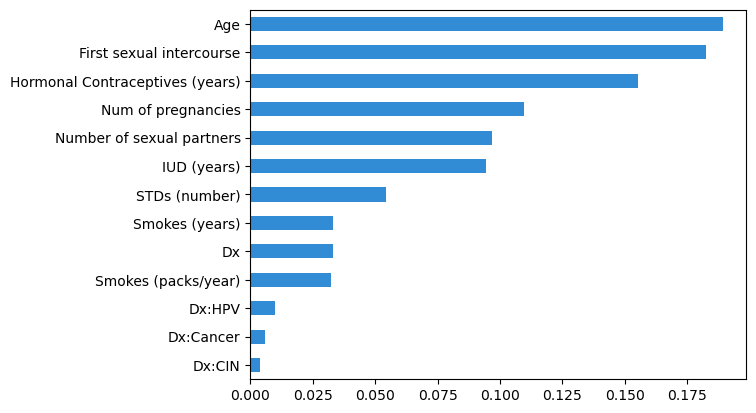

In [45]:
interpreter.feature_importance.plot_feature_importance(model, ascending=False)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

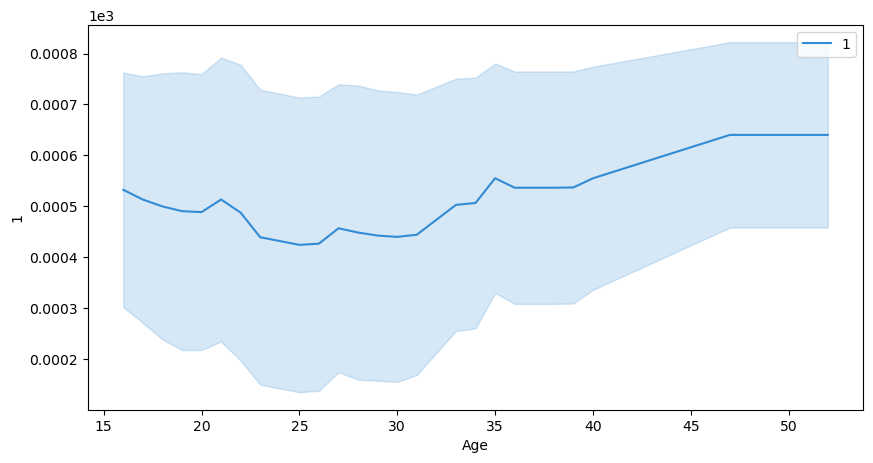

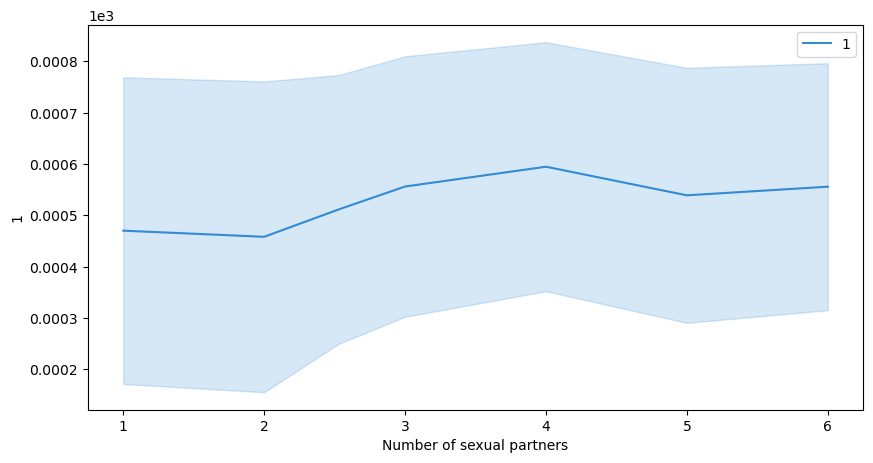

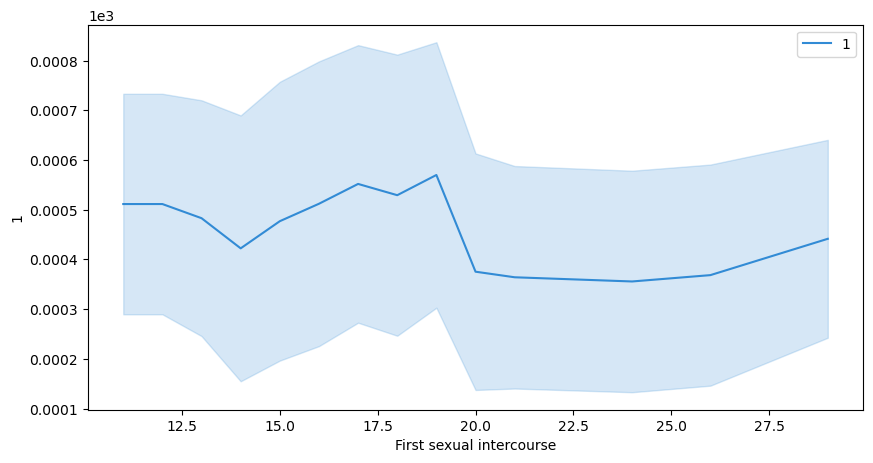

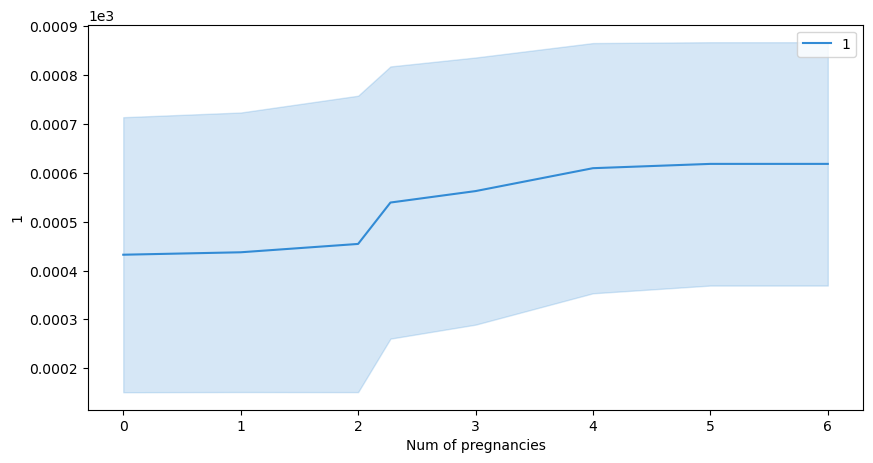

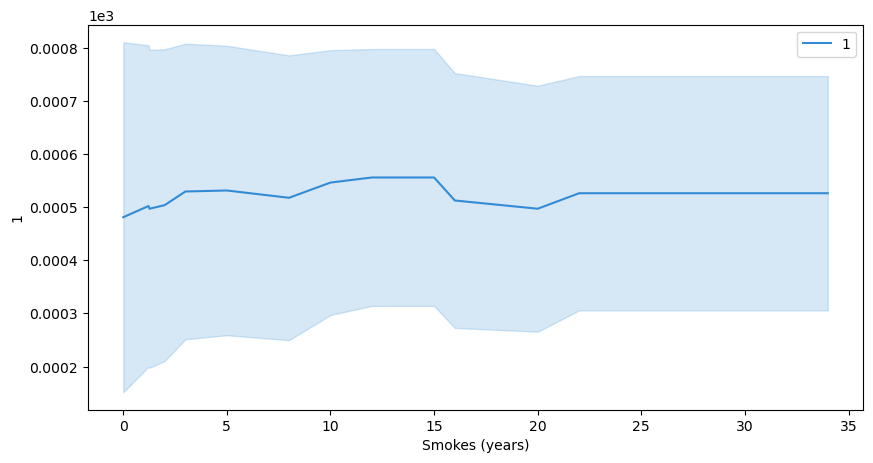

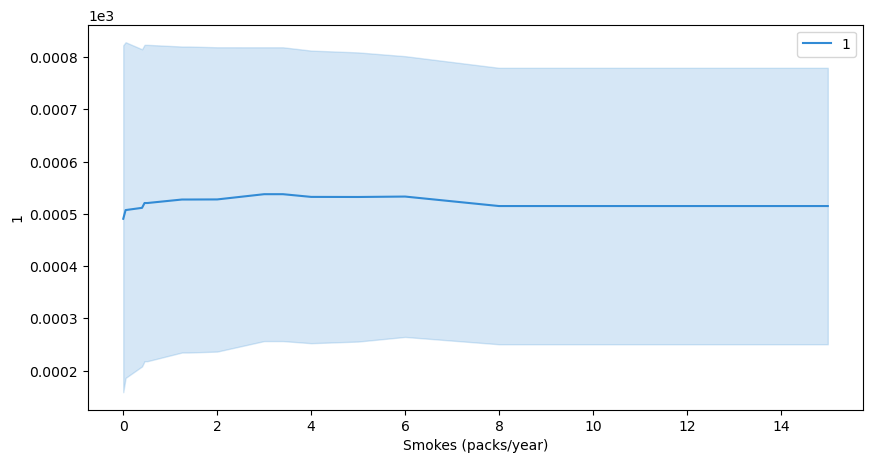

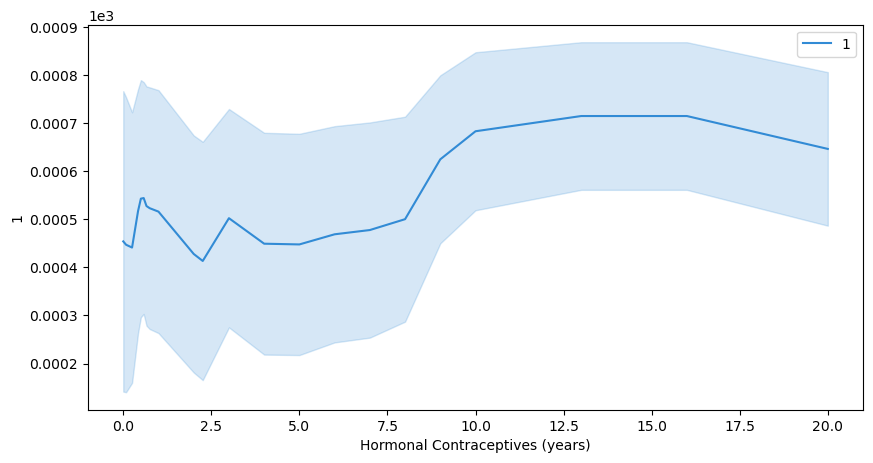

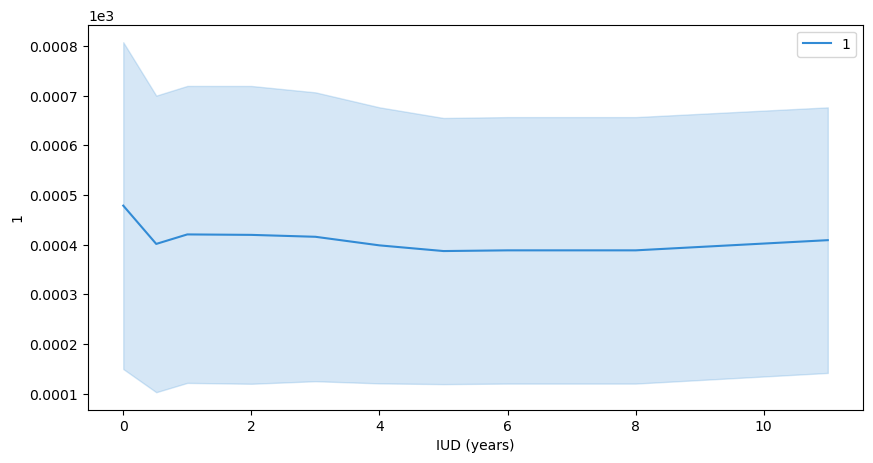

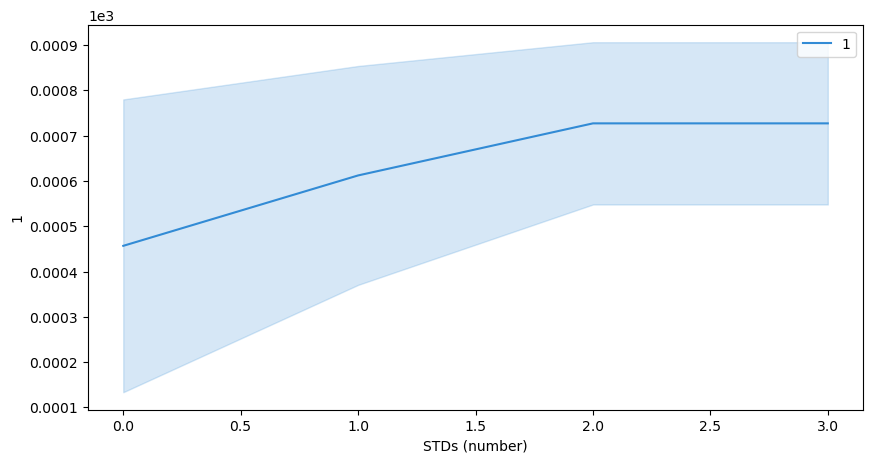

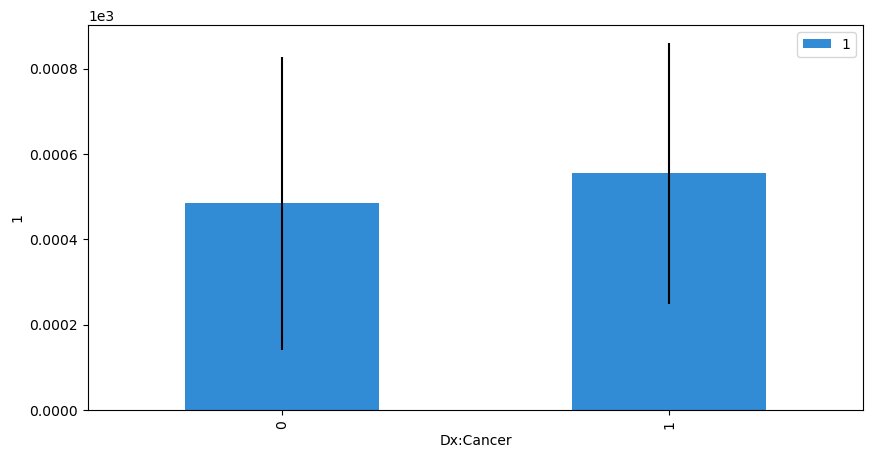

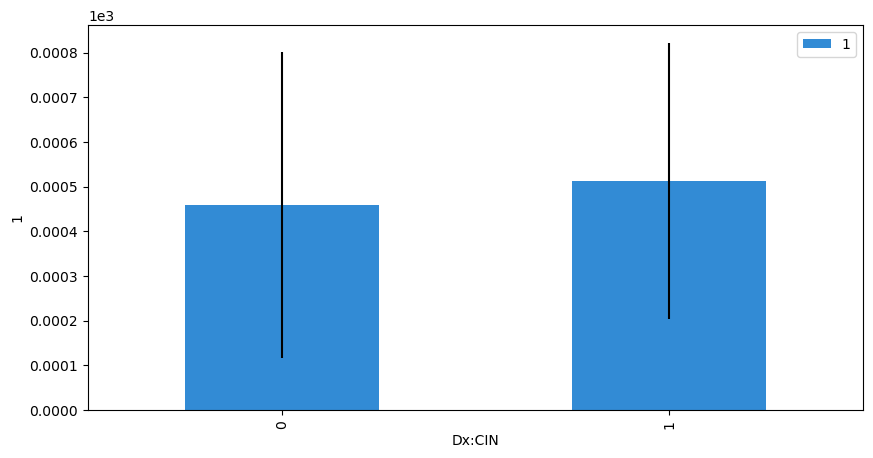

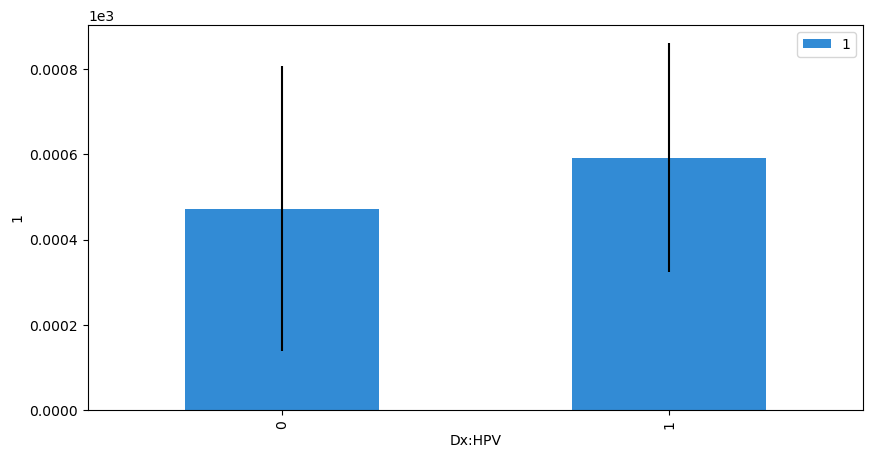

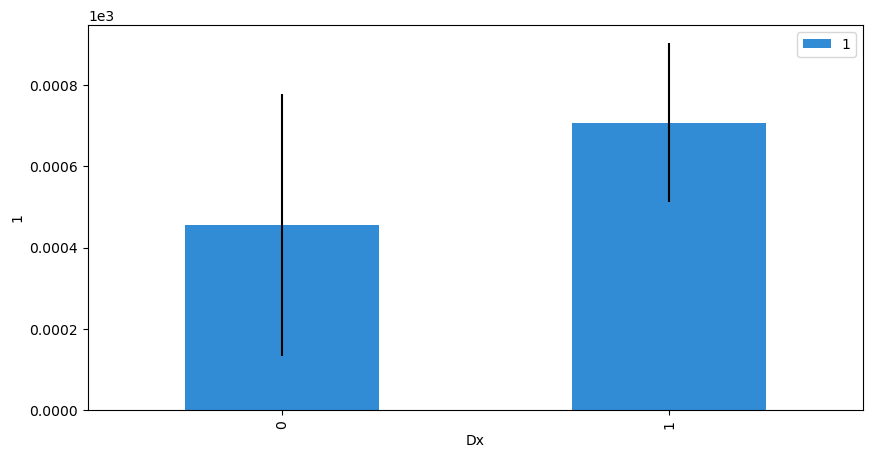

In [170]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

## 3. Ensemble Model

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:

knn = KNeighborsClassifier(n_neighbors = 3)
clf_decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
clf_random_forest = RandomForestClassifier(
            n_estimators = 40,
            max_depth = 34)

In [48]:
model = VotingClassifier(estimators=[('knn', knn), ('dt', clf_decision_tree), ('rf', clf_random_forest)], voting = 'soft')

In [49]:
model.fit_transform(X_underS, y_underS)
y_pred_knn_e = model.fit_transform(X_underS, y_underS)[:, 0]
y_pred_dt_e = model.fit_transform(X_underS, y_underS)[:, 1]
y_pred_rf_e = model.fit_transform(X_underS, y_underS)[:, 2]
model.fit_transform(X_underS, y_underS)

array([[1.        , 0.        , 0.67741935, 0.32258065, 0.95      ,
        0.05      ],
       [0.33333333, 0.66666667, 1.        , 0.        , 0.775     ,
        0.225     ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.95      ,
        0.05      ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.7725    ,
        0.2275    ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.825     ,
        0.175     ],
       [1.        , 0.        , 0.67741935, 0.32258065, 0.85      ,
        0.15      ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.925     ,
        0.075     ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.91      ,
        0.09      ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.975     ,
        0.025     ],
       [0.33333333, 0.66666667, 0.67741935, 0.32258065, 0.6       ,
        0.4       ],
       [0.66666667, 0.33333333, 0.67741935, 0.32258065, 0.75      ,
        0.25      ],
       [0.66666667, 0

### After ensembling

In [50]:
# train
p_pred_ensemble_t = model.predict(X_underS)
confusion_ee = confusion_matrix(y_underS, p_pred_ensemble_t)
confusion_ee

array([[44,  0],
       [10, 34]])

- Accuracy
0.11764705882352941
- Recall
0.5454545454545454
- AUC
0.6329757199322417
- Confusion Matrix
[[116  45]
 [  5   6]]


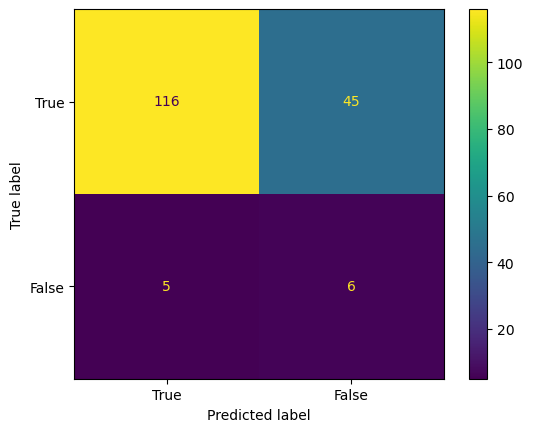

In [51]:
# test
y_pred_ensemble = model.predict(X_test)
getFeedback(y_test, y_pred_ensemble)

### Before ensembling

In [192]:
# KNN
knn.fit(X_underS, y_underS)
getFeedback(y_test, knn.predict(X_test))

- Accuracy
0.1076923076923077
- Recall
0.6363636363636364
- AUC
0.6380575945793336
- Confusion Matrix
[[103  58]
 [  4   7]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [193]:
# Decision tree
clf_decision_tree.fit(X_underS, y_underS)
getFeedback(y_test, clf_decision_tree.predict(X_test))

- Accuracy
0.2608695652173913
- Recall
0.5454545454545454
- AUC
0.7199322416713722
- Confusion Matrix
[[144  17]
 [  5   6]]


In [194]:
# Random Forest
clf_random_forest.fit(X_underS, y_underS)
getFeedback(y_test, clf_random_forest.predict(X_test))

- Accuracy
0.12280701754385964
- Recall
0.6363636363636364
- AUC
0.6629023150762281
- Confusion Matrix
[[111  50]
 [  4   7]]


### Skater on ensemble model

In [52]:
model = InMemoryModel(model.predict_proba, examples = X_train)

In [53]:
interpreter = Interpretation()

In [54]:
interpreter.load_data(X_underS)

In [55]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:CIN                             0.001594
Dx:HPV                             0.005578
Dx:Cancer                          0.007371
Smokes (packs/year)                0.025314
Smokes (years)                     0.044190
Dx                                 0.061932
Num of pregnancies                 0.067333
Number of sexual partners          0.070109
IUD (years)                        0.079927
STDs (number)                      0.083381
First sexual intercourse           0.135994
Hormonal Contraceptives (years)    0.184153
Age                                0.233124
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

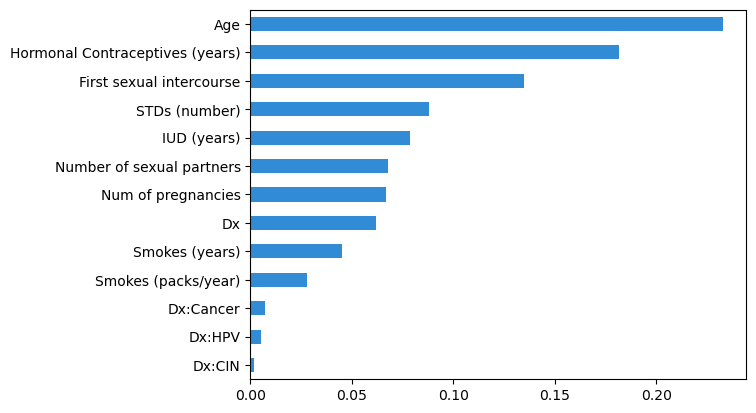

In [56]:
interpreter.feature_importance.plot_feature_importance(model, ascending=False)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

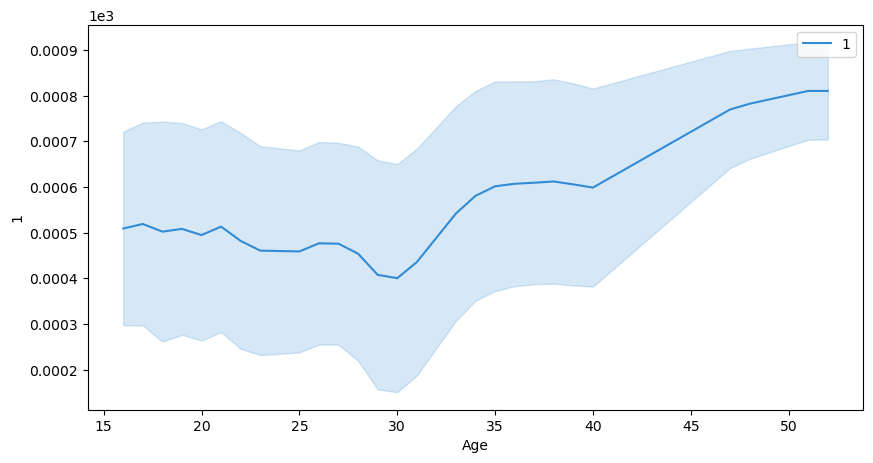

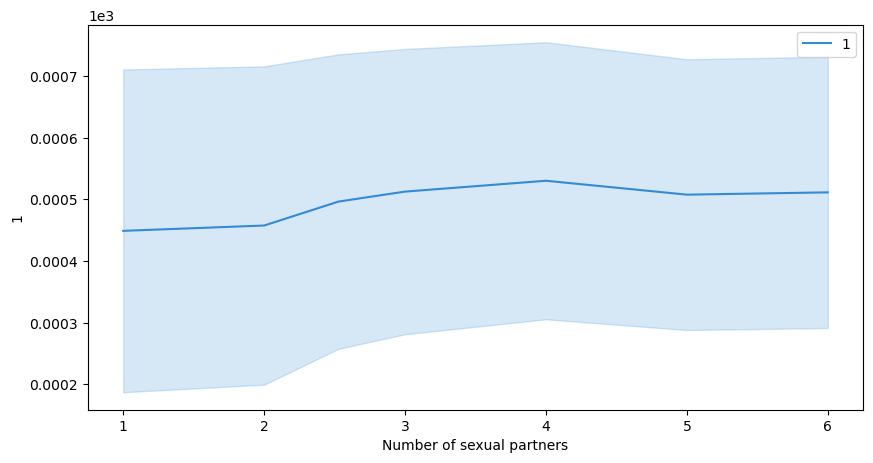

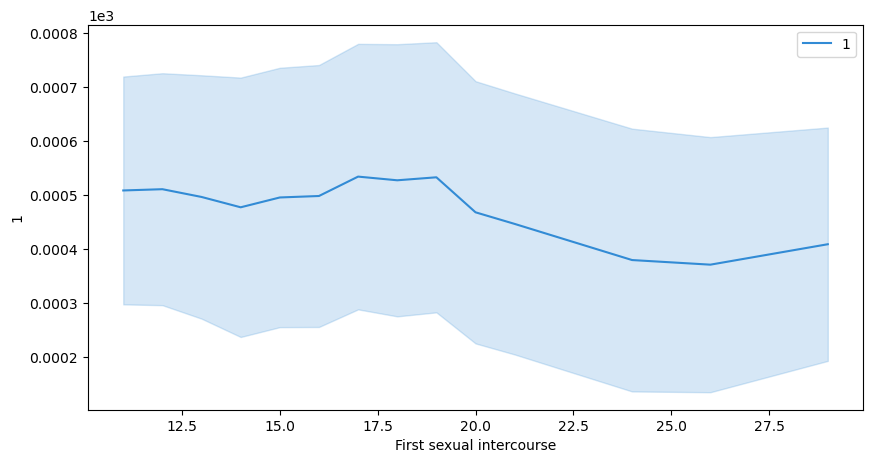

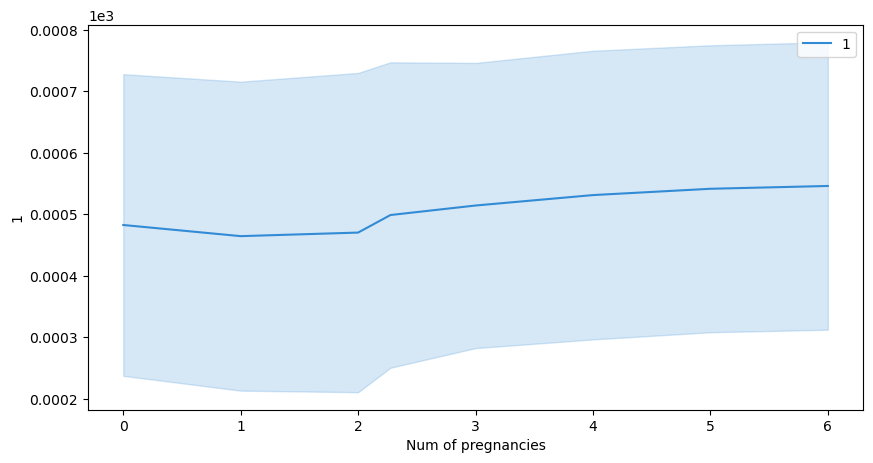

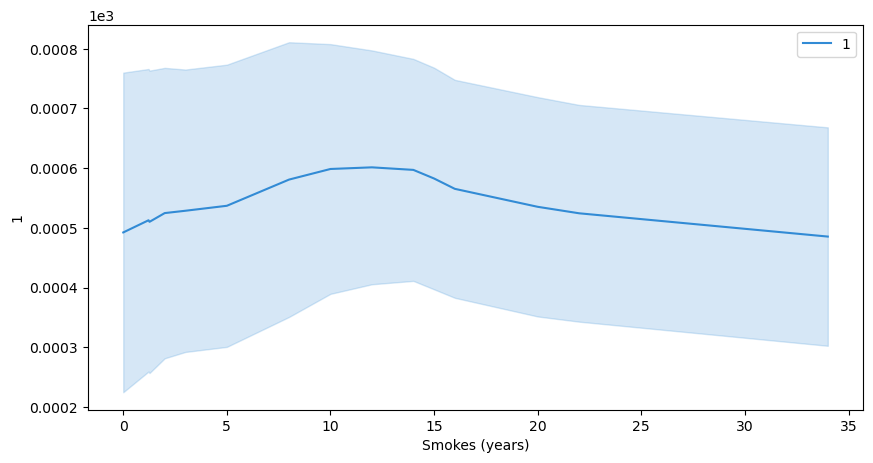

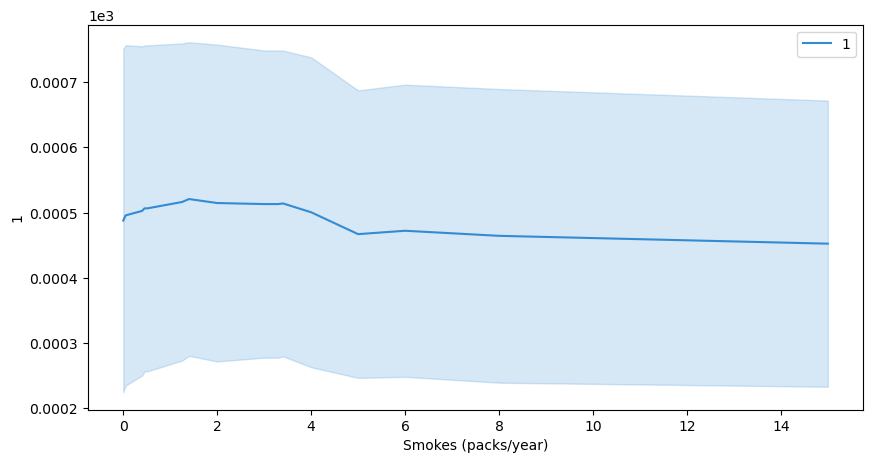

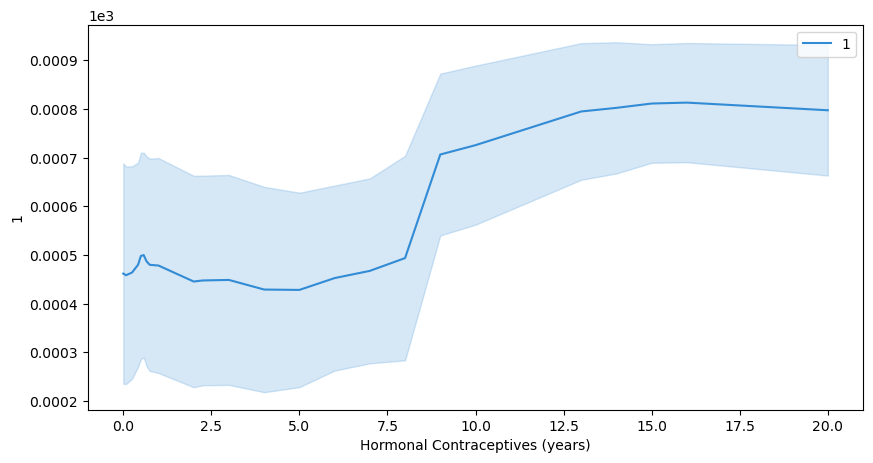

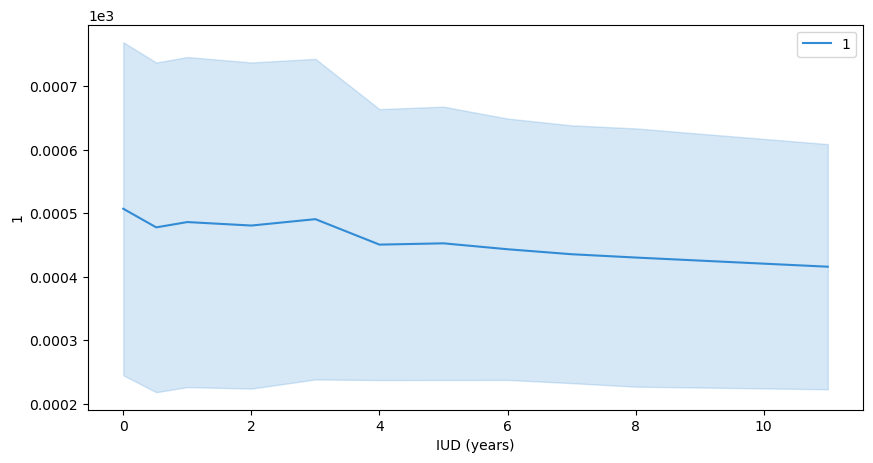

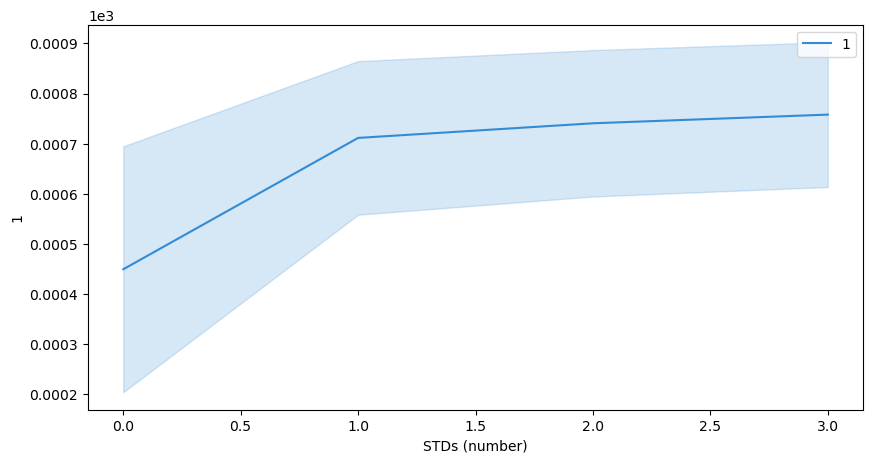

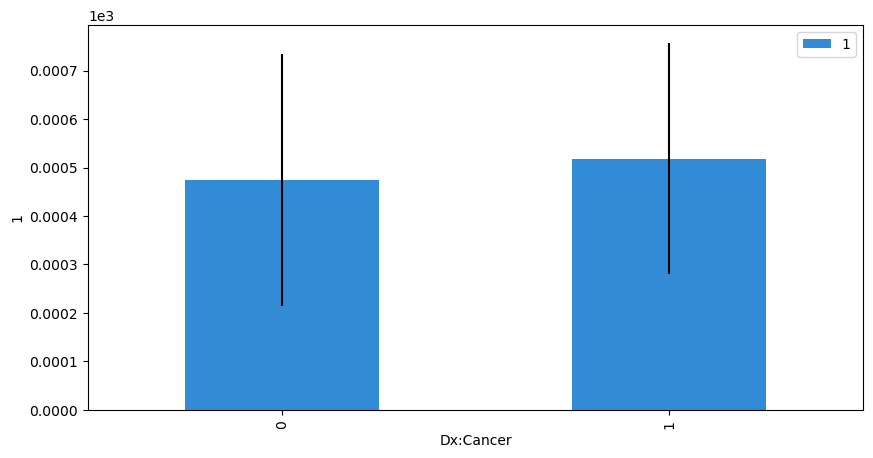

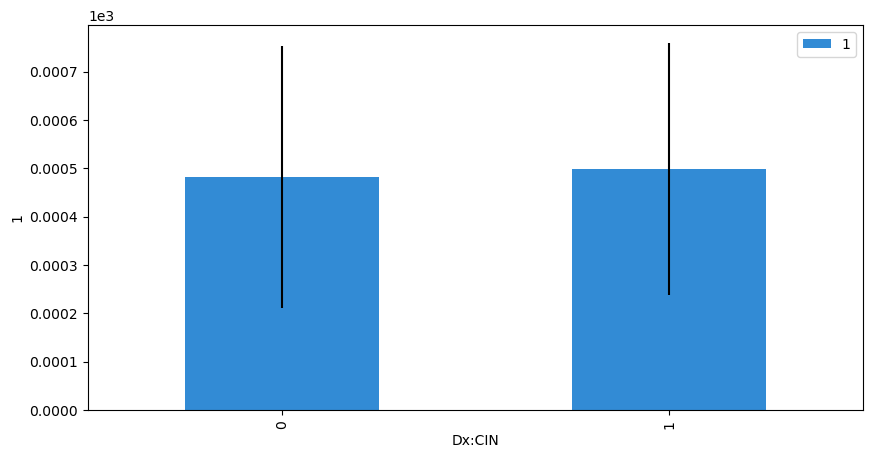

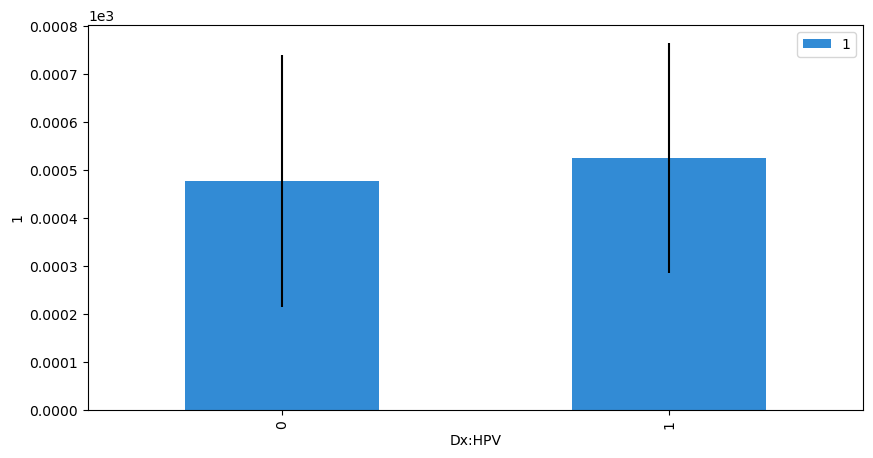

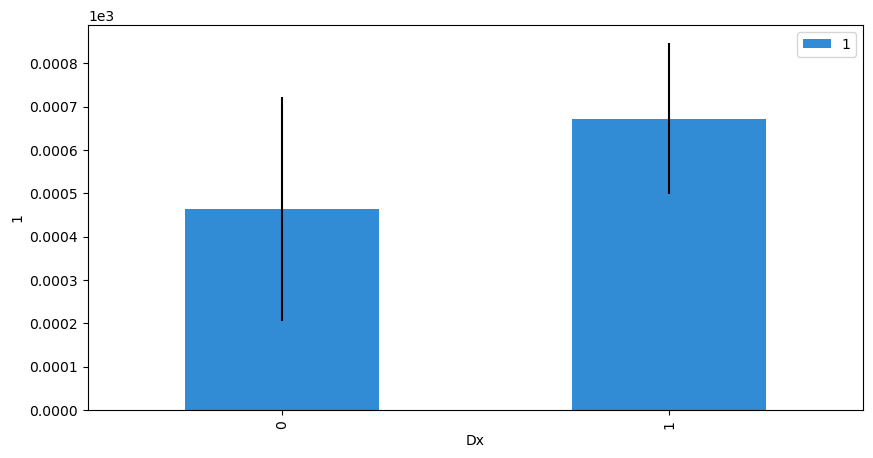

In [200]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))